# **Linear Regression**

Before diving into Linear Regression, we need to know what exactly "regression" is.

Regression is basically the way you find the new value from existing values. What does it mean to find the new value from existing values though? 

Suppose we have a data containing the relationship between the height and the weight.
For instance, 5.5 feet - 60 kg, 5.4 feet - 50kg and so on.

We will have a lot of these height-weight data. And from that data, we derive a certain pattern. Like, for each feet the weight is X. And then from this pattern, we predict or find the new weight for new height.

We will apply this down the line.

### **Now what is "linear" in Linear Regression?**

There are several regression methods, but Linear regression in particular is the way you predict the values from the data which is in **linear** format.

But what does it mean that the data is in linear format?

If the dependent variable increases or decreases with the increse or decrease of your independent variable in uniform way, it's called a linear format.

Example:
- if you age older, your weight will increase with your age, right? (assuming from birth to adulthood)
- With the increase of rounds per minute (rpm) of your wheel, the faster you move, and the faster you get to your destination (assuming no gear changes and no brakes applied)
- the less your spending capacity, the less you buy what you want.

### **Practical Example with Height-Weight data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will be using Numpy for calculations and Matplotlib for plotting the data.

Now let's import the Height-Weight dataset.

In [2]:
data = np.loadtxt("/kaggle/input/weight-hight-dataset/weight-height (1).csv", delimiter=",", skiprows=1, usecols=(1, 2), dtype="float")
print(data)
print(f"\n {data.shape}")

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]

 (10000, 2)


As we can see the data, we have height in inches and weight in pounds.

And we have 10 thousand rows and 2 columns. That's a lot of data there.

Let's put the Height in **x** and Weight in **y**, so that we can plot and analyze how our data looks like.

In [3]:
x = (data[:, 0]) 
y = (data[:, 1]) 

Text(0, 0.5, 'Weight (pounds)')

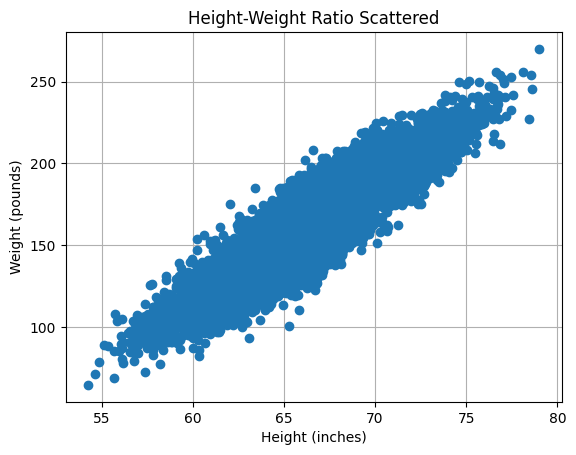

In [4]:
plt.plot(x, y, "o")
plt.grid(True)
plt.title("Height-Weight Ratio Scattered")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")

Woah, this is how our data looks like when we plot into the graph. 

As you can see, there is a continuous change in weight.
5ft tall people range from 40-60 kg.
5.5 ft tall people ranging from 55 to almost 90 and so on.

Here, we need to find what is the best pattern of height-weight that defines this dataset. By how much weight increases with the increase of height **according to this data**.

**How are we going to find the pattern though?**

We will be using Ordinary Least Squares(OLS) method for this. 

We did see our data right? We will draw a line such that, each and every point in the graph is the nearest to the line.

OLS finds the line that minimizes the sum of squared vertical distances (distance from the point to the line) from each data point to the line. We square the distances to prevent negative and positive errors from canceling each other out, ensuring we're truly minimizing the total error.

And that line is called **best-fit line**.

Where best-fit line is just a slope i.e. how much y changes due respect to x, in a straight line which starts from when x is 0 (intercept).

**Now how are we going to find the best-fit line?**

Fortunately, we already have a formula that one-shots the best-fit line for us.

1. Calculate the average of x and y (mean)
2. Calculate how much x and y vary together i.e. Covariance(x,y)
3. Calculate how much x varies by itself i.e. Variance(x)
4. Calculate the slope(m) i.e. Covariance(x,y) divided by Variance(x) (how much y changes with respect to x)
5. Calculate the intercept i.e. c = avg of (y) - m * avg of (x) (value of y when x=0)

Formula is:

m = Σ[(xi - x̄)(yi - ȳ)] / Σ[(xi - x̄)²], where xi is the independent variable, x hat is average of x, yi is dependent variable and y hat is average of y.

In [5]:
# 1. Calculating the average of x and y

x_mean = np.mean(x)
y_mean = np.mean(y)

print(x_mean)
print(y_mean)

66.36755975482124
161.44035683283076


Here, the average height is 66.37 inches and the average weight is 161.44 pounds.

Text(0, 0.5, 'Average Weight (y_mean)')

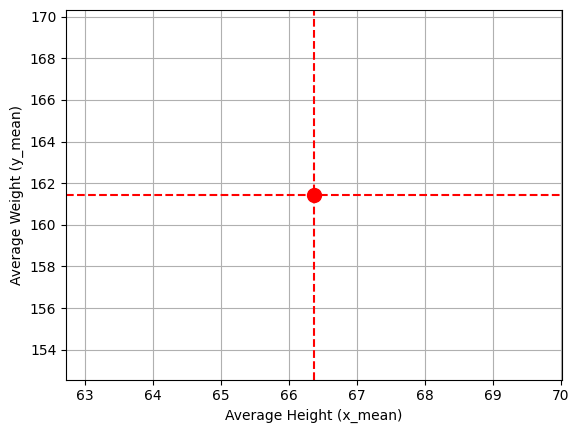

In [6]:
plt.axvline(x=x_mean, color='red', linestyle='--', label=f'Average Height: {x_mean:.1f}')
plt.axhline(y=y_mean, color='red', linestyle='--', label=f'Average Weight: {y_mean:.1f}')

plt.scatter(x_mean, y_mean, color="red", s=100)
plt.grid(True)
plt.xlabel("Average Height (x_mean)")
plt.ylabel("Average Weight (y_mean)")

What this means is, our best-fit line should pass through this point or just pass closely to this red point (66.37, 161.44)

In [7]:
# 2. Calculate how much x and y vary together (Σ[(xi - x̄)(yi - ȳ)])

x_deviation = x - x_mean
y_deviation = y - y_mean

print(x_deviation, y_deviation)

covariance = np.sum(x_deviation * y_deviation)/(len(x)-1) # or we can just use x_deviation
covariance

[ 7.47945726  2.41434429  7.74254564 ... -2.49956754  2.66668338
 -4.42331388] [ 80.45320635   0.87011569  51.30049872 ... -32.96503805   2.41210451
 -47.79125416]


114.24265644646304

As we can see above, there are both positive and negative deviations from the mean.

x_deviation tells us how much a person is taller or shorter than the average. Positive tells us taller and negative denotes shorter.
While, y_deviation tells us how much a person is far or near from average weight.

114.24 is our covariance.

In [8]:
# Calculate how much x varies by itself

# since we have already calculated the x - x_mean, which is x_deviation, we will use that

variance = np.sum((x_deviation) ** 2)/(len(x)-1)
variance

14.803472640140773

In [9]:
# Calculate the slope or our best-fit-line

slope = covariance / variance
print(slope)

7.717287640785389


This means, according to our dataset, there is 7.71 pounds of increase with each increase of an inch in height.

In [10]:
# Calculate the intercept

intercept = y_mean - slope * x_mean
intercept

-350.737191812137

Well our intercept is -350.74, but how can this be possible in reality? How can a man be of -350 pounds when his height is 0. But let's find that out by predicting some values.

In [11]:
test_height1 = data[45, 0] # 70.1 inches tall male has weight of 188.92 pounds in our dataset
test_weight1 = data[45, 1]
print(f"test height 1: {test_height1}")
print(f"test weight 1: {test_weight1}")

prediction1 = slope * 70.1047 + intercept
print(f"predicted weight 1: {prediction1} \n")

test_height2 = data[9999, 0]
test_weight2 = data[9999, 1]
print(f"test height 2: {test_height2}")
print(f"test weight 2: {test_weight2}")

prediction2 = slope * 61.9442458795172 + intercept
print(f"predicted weight 2: {prediction2}")

test height 1: 70.1047862551571
test weight 1: 188.922303151274
predicted weight 1: 190.28094305883042 

test height 2: 61.9442458795172
test weight 2: 113.649102675312
predicted weight 2: 127.30437133163235
